In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/TUM'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
weights = models.AlexNet_Weights
model = models.alexnet(weights=weights)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
      if i > min_:
        inputs, labels = data
        output1 = torch.flatten(model.avgpool(model.features(inputs)),1)
        outputs = model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output1)))))
        output_.append(outputs)
        if i > max_:
          return output_


In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      output1 = torch.flatten(model.avgpool(model.features(inputs)),1)
      outputs = model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output1)))))
      output_[i-aux_] = torch.cat((output_[i-aux_], outputs), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,85):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*100
    max_ = n_it*100
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_tum_alexnet/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


error


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    if max_dist <= dist_limit:
        return True
    
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        bg = match(descriptor, d, 220)
        if bg:
            belief.append(1)
        else:
            belief = []
        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:

database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41,database42,database43,database44,database45,database46,database47,database48,database49,database50,
            database51,database52,database53,database54,database55,database56,database57,database58,database59,database60,
            database61,database62,database63,database64,database65,database66,database67,database68,database69,database70,
            database71,database72,database73,database74,database75,database76,database77,database78,database79,database80,
            database81,database82,database83]
d = []

In [ ]:
co = 0
for bg in database:
  co += 1
  for i,data in enumerate(bg):
    if i < 3:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      if loop_ > 0:
        with open('/content/drive/MyDrive/Datasets/TUM_/loop_tum_alexnet.txt', 'a') as txt_file:
          txt_file.write('\n Found loop')
          image_number = (co*100)+i
          txt_file.write('\n image: '+str(image_number))
      else:
        d.append(data)
  


A saída de streaming foi truncada nas últimas 5000 linhas.
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.3352]],
       requires_grad=True)
loop
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.3352]],
       requires_grad=True)
loop
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.3352]],
       requires_grad=True)
loop
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.3352]],
       requires_grad=True)
loop
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.3352]],
       requires_grad=True)
loop
tensor([[-10.1821,  -9.3499,  -6.2949,  ...,  -5.9351,  -1.9800,  -4.3194]],
       requires_grad=True)
loop
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.3352]],
       requires_grad=True)
loop
tensor([[-10.1821,  -9.3499,  -6.2949,  ...,  -5.9351,  -1.9800,  -4.3194]],
       requires_grad=True)
loop
tensor([[ -6.8567, -10.6175,  -5.7899,  ...,  -5.0228,  -8.3321,  -5.

In [ ]:
c = 0
for d in database2:
    distance = torch.cdist(d, database1[0], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 571.3642578125
image: 1, distance: 570.0533447265625
image: 2, distance: 591.9606323242188
image: 3, distance: 552.6087646484375
image: 4, distance: 565.3890380859375
image: 5, distance: 561.7564697265625
image: 6, distance: 576.9081420898438
image: 7, distance: 555.10693359375
image: 8, distance: 511.2027282714844
image: 9, distance: 512.1166381835938
image: 10, distance: 499.56927490234375
image: 11, distance: 546.15087890625
image: 12, distance: 498.503662109375
image: 13, distance: 491.01470947265625
image: 14, distance: 501.3139343261719
image: 15, distance: 495.9561462402344
image: 16, distance: 491.2485656738281
image: 17, distance: 494.1988525390625
image: 18, distance: 511.88671875
image: 19, distance: 491.5343017578125
image: 20, distance: 510.2760925292969
image: 21, distance: 562.0899047851562
image: 22, distance: 546.1990966796875
image: 23, distance: 520.6054077148438
image: 24, distance: 539.3886108398438
image: 25, distance: 492.93572998046875
image:

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/tum_alexnet.csv')


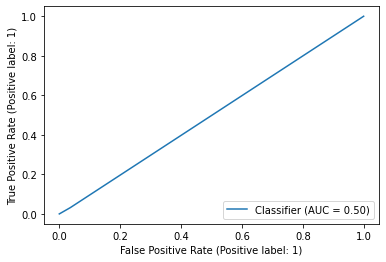

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.4978078342247604
Accuracy:  0.8827710843373494
f1:  0.045142296368989206


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[7304,  275],
       [ 698,   23]])